# Aceleradev Codenation - Semana 3
## Túlio Vieira de Souza | Data Scientist

dados : https://www.kaggle.com/rubenssjr/brasilian-houses-to-rent

Colunas 

- city : Cidade onde o imóvel está localizada / City where the property is located
- area : Area do imovel / Property area
- rooms: Numero de quartos/ Quantity of rooms
- bathroom: Numero de banheiros / Quantity of bathroom
- parking spaces : Numero de vagas / Quantity of parking spaces
- floor : Andar / Floor
- animal : Aceita animais? / Acept animals?
- furniture : Mobilhada? / Furniture?
- hoa (RS): Valor do condomínio / Homeowners association tax 
- rent amount (RS) : Valor do Aluguel (/) Rent amount 
- property tax (RS) : IPTU (/) Property tax
- fire insurance (RS) : Seguro Incendio / Fire Insurance
- total (RS) : Valor total / Total

### Importando os pacotes

In [30]:
import pandas as pd

In [31]:
df = pd.read_csv('houses_to_rent_v2.csv')

In [32]:
df.head(5)

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [33]:
df.dtypes

city                   object
area                    int64
rooms                   int64
bathroom                int64
parking spaces          int64
floor                  object
animal                 object
furniture              object
hoa (R$)                int64
rent amount (R$)        int64
property tax (R$)       int64
fire insurance (R$)     int64
total (R$)              int64
dtype: object

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
city                   10692 non-null object
area                   10692 non-null int64
rooms                  10692 non-null int64
bathroom               10692 non-null int64
parking spaces         10692 non-null int64
floor                  10692 non-null object
animal                 10692 non-null object
furniture              10692 non-null object
hoa (R$)               10692 non-null int64
rent amount (R$)       10692 non-null int64
property tax (R$)      10692 non-null int64
fire insurance (R$)    10692 non-null int64
total (R$)             10692 non-null int64
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


# Problema : Explorar o valor do aluguel (rent amount RS)

## Estatística univariada

In [35]:
df.rename(columns = {'rent amount (R$)' : 'valor_aluguel'}, inplace = True)

In [36]:
df['valor_aluguel'].mean()

3896.247194163861

In [37]:
df['valor_aluguel'].median()

2661.0

In [38]:
df['valor_aluguel'].std()

3408.5455176710816

In [39]:
df['valor_aluguel'].describe()

count    10692.000000
mean      3896.247194
std       3408.545518
min        450.000000
25%       1530.000000
50%       2661.000000
75%       5000.000000
max      45000.000000
Name: valor_aluguel, dtype: float64

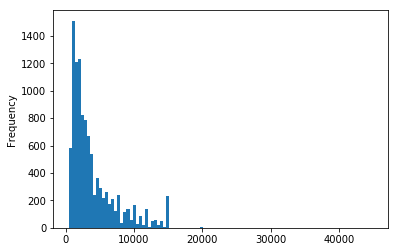

In [40]:
df['valor_aluguel'].plot(kind = 'hist', bins= 100)

In [41]:
#skewness positive skew
df.valor_aluguel.skew()

1.8388773035440982

In [42]:
#kurtose - leptocurtica
df.valor_aluguel.kurtosis()


4.624228179818687

### Exploração multivariáveis

* **Perguntas**
    - Qual a cidade com a média de aluguel mais cara?
    - Quantos banheiros existem nas residências com alugueis caros?
    - Os imóveis mais caros aceitam animais?
    - Os imóveis mais caros são mobiliados?
    
* **Hipóteses**
    - São Paulo é a cidade com o aluguel mais caro.
    - Quanto mais banheiros em um imóvel maior o valor do aluguel.
    - Os imóveis com mobilia tem o aluguel mais alto.
    

Qual a cidade com a média de aluguel mais alta?

In [43]:
df.groupby('city')['valor_aluguel'].mean().reset_index().sort_values('valor_aluguel', ascending = False)

,city,valor_aluguel
4,São Paulo,4652.793783
0,Belo Horizonte,3664.127981
3,Rio de Janeiro,3232.904064
1,Campinas,2364.290739
2,Porto Alegre,2337.699916


Quantos banheiros existem nas residências com alugueis mais altos?

In [44]:
df['valor_aluguel'].describe()

count    10692.000000
mean      3896.247194
std       3408.545518
min        450.000000
25%       1530.000000
50%       2661.000000
75%       5000.000000
max      45000.000000
Name: valor_aluguel, dtype: float64

Dessa forma, podemos perceber que o valor máximo de alugueis é 5000 acima

In [45]:
df['aluguel_alto'] = ['Alto' if x > 5000 else 'Baixo' for x in df['valor_aluguel']]

In [46]:
df['valor_aluguel'].value_counts()

2500     258
2000     244
1200     237
3000     235
15000    231
3500     216
1800     215
1500     211
4000     202
2200     201
1100     201
4500     182
6000     179
5000     178
1300     177
1600     172
8000     168
1000     167
2800     147
10000    142
5500     138
1700     134
7000     128
2300     128
12000    127
1400     121
1900     105
9000     103
3200     102
2100      99
        ... 
644        1
628        1
8712       1
1084       1
1172       1
1764       1
5470       1
1756       1
5830       1
9920       1
13970      1
7735       1
5670       1
5590       1
1428       1
1412       1
1396       1
7511       1
3229       1
3413       1
1364       1
5430       1
9520       1
3365       1
3325       1
1268       1
5350       1
1236       1
1196       1
4130       1
Name: valor_aluguel, Length: 1195, dtype: int64

In [47]:
df.groupby('aluguel_alto')['bathroom'].mean()

aluguel_alto
Alto     3.729027
Baixo    1.772108
Name: bathroom, dtype: float64

In [48]:
df[['valor_aluguel', 'bathroom']].corr(method = 'spearman')

,valor_aluguel,bathroom
valor_aluguel,1.00000,0.71589
bathroom,0.71589,1.00000


In [52]:
aux = pd.DataFrame({'colunas' : df.columns, 'tipos' : df.dtypes})

In [53]:
aux

,colunas,tipos
city,city,object
area,area,int64
rooms,rooms,int64
bathroom,bathroom,int64
parking spaces,parking spaces,int64
floor,floor,object
animal,animal,object
furniture,furniture,object
hoa (R$),hoa (R$),int64
valor_aluguel,valor_aluguel,int64


In [54]:
lista = list(aux[aux['tipos'] == 'int64']['colunas'])

In [55]:
for coluna in lista:
    print(coluna)
    print(df[['valor_aluguel', coluna]].corr(method = 'spearman'))

area
               valor_aluguel      area
valor_aluguel       1.000000  0.728095
area                0.728095  1.000000
rooms
               valor_aluguel     rooms
valor_aluguel       1.000000  0.600969
rooms               0.600969  1.000000
bathroom
               valor_aluguel  bathroom
valor_aluguel        1.00000   0.71589
bathroom             0.71589   1.00000
parking spaces
                valor_aluguel  parking spaces
valor_aluguel        1.000000        0.620175
parking spaces       0.620175        1.000000
hoa (R$)
               valor_aluguel  hoa (R$)
valor_aluguel       1.000000  0.355785
hoa (R$)            0.355785  1.000000
valor_aluguel
               valor_aluguel  valor_aluguel
valor_aluguel            1.0            1.0
valor_aluguel            1.0            1.0
property tax (R$)
                   valor_aluguel  property tax (R$)
valor_aluguel            1.00000            0.65923
property tax (R$)        0.65923            1.00000
fire insurance (R$)
          

### Visualização dos dados

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

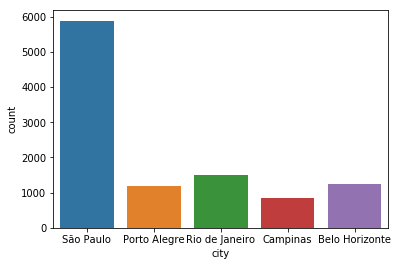

In [66]:
sns.countplot(x = 'city', data = df)

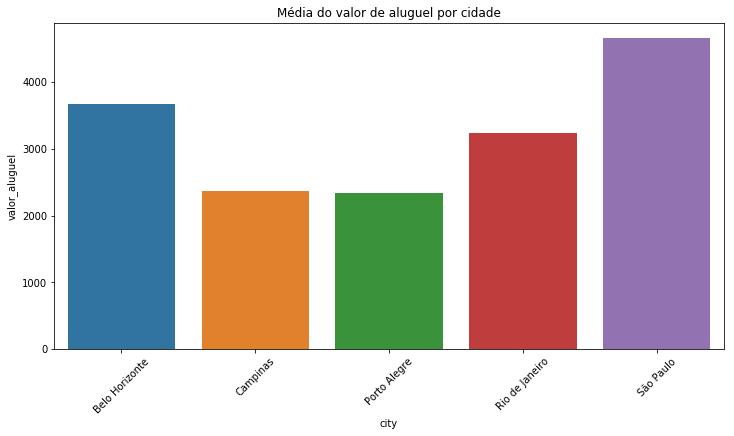

In [71]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'city', y = 'valor_aluguel', data = df.groupby('city')['valor_aluguel'].mean().reset_index())
plt.title('Média do valor de aluguel por cidade')
plt.xticks(rotation = 45)
plt.show()

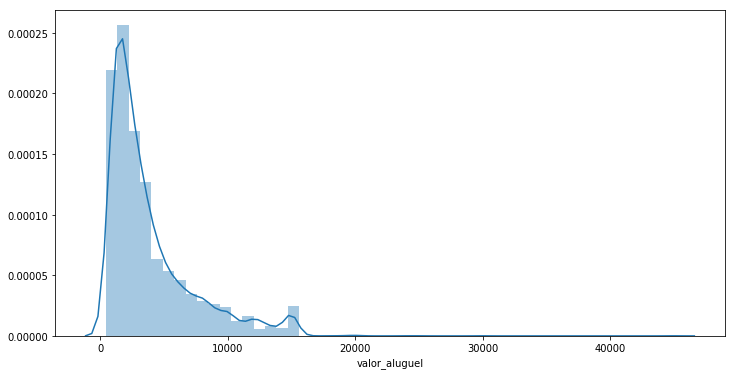

In [73]:
plt.figure(figsize = (12,6))
sns.distplot(df['valor_aluguel'])

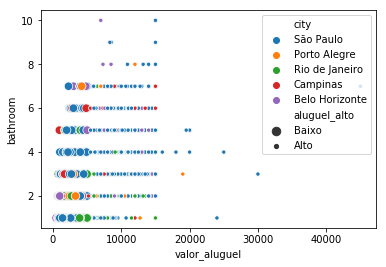

In [77]:

sns.scatterplot(x = 'valor_aluguel', y = 'bathroom', hue = 'city',size = 'aluguel_alto', data = df)

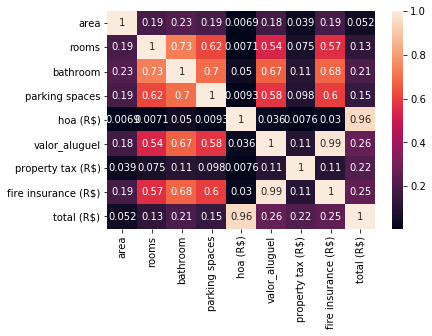

In [79]:
sns.heatmap(df.corr(), annot = True)

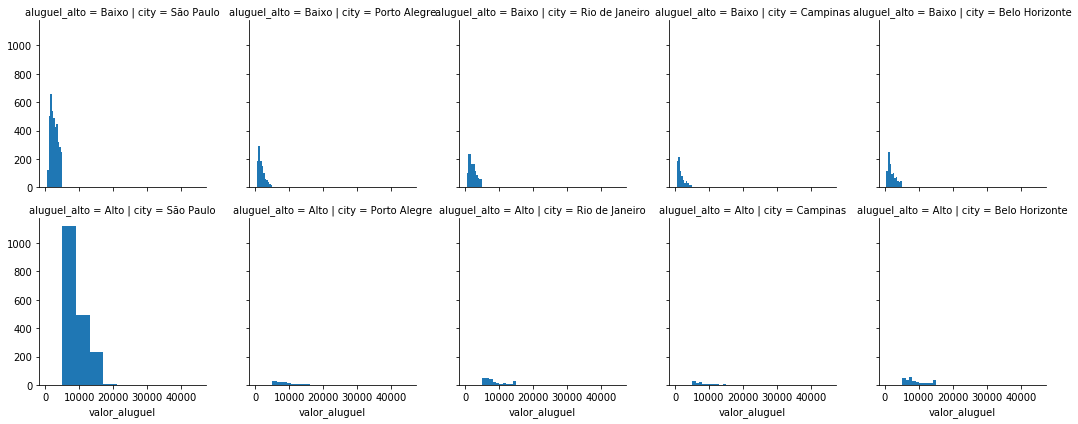

In [82]:
g = sns.FacetGrid(df, col='city', row = 'aluguel_alto')

g = g.map(plt.hist, 'valor_aluguel')